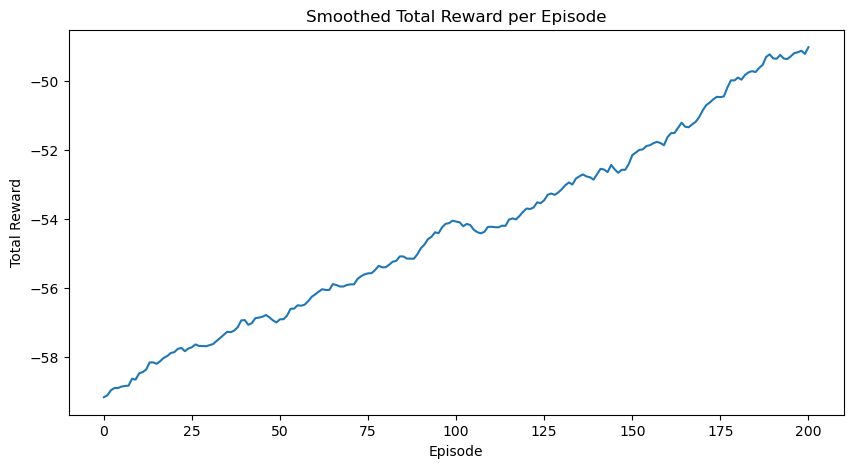

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# --- PLOTTING FUNCTION ---
def plot_rewards(rewards, file_name, smoothing_window=100, save_path="plots"):
    smoothed = np.convolve(rewards, np.ones(smoothing_window)/smoothing_window, mode='valid')
    plt.figure(figsize=(10, 5))
    plt.plot(smoothed)
    plt.title("Smoothed Total Reward per Episode")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.savefig(f"{save_path}/{file_name}.png")
    plt.show()

    # plt.figure(figsize=(10, 5))
    # plt.plot(rewards)
    # plt.title("Total Reward per Episode")
    # plt.xlabel("Episode")
    # plt.ylabel("Total Reward")
    # plt.savefig(f"{save_path}/{file_name}_rewards.png")
    # plt.show()
file_name="dqn_gray_alpha_09_gamma09"
rewards = np.load(f"arrays/{file_name}.npy")
plot_rewards(rewards, file_name)

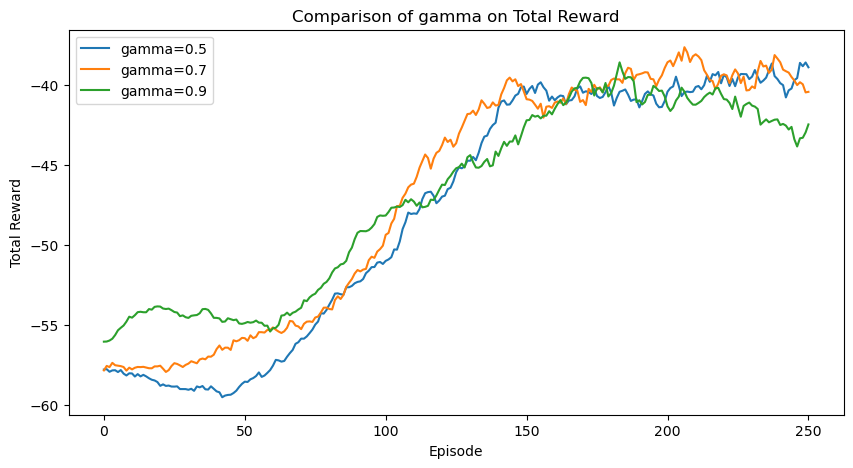

In [23]:
alphas = [0.1, 0.5, 0.9]
gammas = [0.5,0.7,0.9]
def plot_compare(rewards, constant="alpha",smoothing_window=50):
    plt.figure(figsize=(10, 5))
    if constant == "alpha":
        gamma = "09"
        for alpha in alphas:
            a = str(alpha).replace(".", "")

            file = f"dqn_gray_alpha_{a}_gamma{gamma}"
            rewards = np.load(f"arrays/{file}.npy")
            smoothed = np.convolve(rewards, np.ones(smoothing_window)/smoothing_window, mode='valid')
            plt.plot(smoothed, label=f"alpha={alpha}")
    elif constant == "gamma":
        alpha = "01"
        for gamma in gammas:
            g = str(gamma).replace(".", "")
            file = f"dqn_gray_alpha_{alpha}_gamma{g}"
            rewards = np.load(f"arrays/{file}.npy")
            smoothed = np.convolve(rewards, np.ones(smoothing_window)/smoothing_window, mode='valid')
            plt.plot(smoothed, label=f"gamma={gamma}")

    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title(f"Comparison of {constant} on Total Reward")
    plt.legend()
    plt.show()

plot_compare(rewards, constant="gamma")
